In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import random
from collections import Counter
import cv2
import pytesseract
import re

In [1117]:
images = list(data_dir.glob("*.png"))
for image in images:
    mpimg.imsave(str(image.parent) +'/'+image.stem +'.jpg', mpimg.imread(image,0), cmap='gray',vmin=0, vmax=255)

In [1129]:
# Path to the data directory
data_dir = Path("dataset/")

# Get list of all the images
images = list(data_dir.glob("*.jpg"))

num_images = len(images)

print("Number of images: ", num_images)

Number of images:  15


Shape of images:  (50, 150, 3)


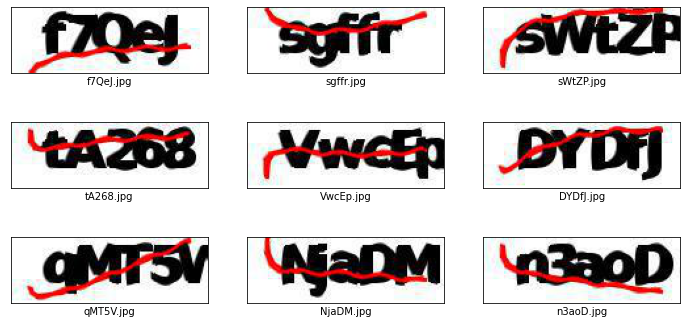

In [212]:
plt.figure(figsize=(12,6))
random_images = random.sample(range(num_images), 9)
print("Shape of images: ", mpimg.imread(str(images[random_images[0]]),0).shape)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(str(images[random_images[i]]),0))
    plt.xlabel(str(images[random_images[i]]).split('\\')[-1].split('/')[-1])
plt.show()

In [228]:
characters = set()
for img_path in images:
    label = img_path.name.split(".jpg")[0]
    for ch in label:
        characters.add(ch)

print("Number of unqiue charcaters: ", len(characters))
print("Characters present: ", sorted(characters))
print("Total number of samples: ", len(images))

Number of unqiue charcaters:  43
Characters present:  ['2', '3', '5', '6', '7', '8', 'A', 'B', 'C', 'D', 'E', 'F', 'J', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'k', 'n', 'o', 'p', 'q', 'r', 's', 't', 'v', 'w', 'y']
Total number of samples:  14


Shape:  (50, 150)


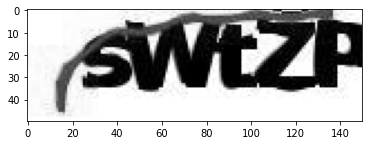

In [573]:
images = list(data_dir.glob("*.jpg"))

img = cv2.imread(str(images[8]), -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
print('Shape: ', img.shape)

Original: AbgBy Processed: AbgBy Equal: True


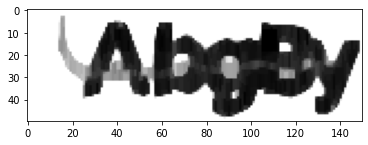

In [1101]:
def otsu_thresholding(img):
    ret2, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU+2)
    img = cv2.dilate(img, np.ones((3,2), np.uint8), iterations=1)
    img = cv2.erode (img, np.ones((4,1), np.uint8), iterations=2)
    img = cv2.dilate(img, np.ones((3,1), np.uint8), iterations=2)
    img = cv2.erode (img, np.ones((2,1), np.uint8), iterations=2)
    return img

res = otsu_thresholding(img)
plt.imshow(res, cmap='gray')
plt.imsave("dataset//processed/{}.jpg".format(image.stem), res, cmap='gray')
captcha = pytesseract.image_to_string('dataset/processed/'+image.stem +'.jpg')
captcha = re.sub('[^A-Za-z0-9]+', '', captcha)
print('Original: ' + image.stem + ' Processed: ' + captcha + ' Equal: ' + str(image.stem == captcha))

Original: VfFnh Processed: VfFnh Equal: True
Original: DYDfJ Processed: DYDr Equal: False
Original: Rs7ov Processed: RS76V Equal: False
Original: Ca7Qk Processed: Ca7Qk Equal: True
Original: VwcEp Processed: Vwecp Equal: False
Original: n3aoD Processed: n3a0D Equal: False
Original: sgffr Processed:  Equal: False
Original: tA268 Processed: tA268 Equal: True
Original: sWtZP Processed:  Equal: False
Original: f7QeJ Processed:  Equal: False
Original: aaimg Processed:  Equal: False
Original: NjaDM Processed: NadDM Equal: False
Original: qMT5V Processed: QMTSvV Equal: False
Original: ZS7pc Processed: ZS7pc Equal: True
Original: AbgBy Processed: AbgBy Equal: True
5 33.33


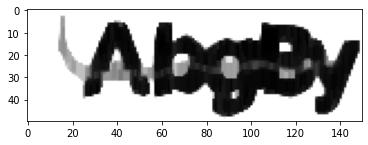

In [1123]:
c = 0
for image in images:
    img = cv2.imread(str(image), -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res = otsu_thresholding(img)
    plt.imsave("dataset//processed/{}.jpg".format(image.stem), res, cmap='gray')
    captcha = pytesseract.image_to_string('dataset/processed/'+image.stem +'.jpg')
    captcha = re.sub('[^A-Za-z0-9]+', '', captcha)
    if image.stem == captcha:c +=1
    print('Original: ' + image.stem + ' Processed: ' + captcha + ' Equal: ' + str(image.stem == captcha))
    
print(c, round(c/len(images)*100,2))
plt.imshow(res, cmap='gray')

In [11]:
# Path to the data directory
data_dir = Path("temp/")

# Get list of all the images
images = list(data_dir.glob("*.jpg"))

num_images = len(images)

print("Number of images: ", num_images)

Number of images:  85


In [16]:
c = 0
for image in images:
    captcha = re.sub('[^A-Za-z0-9]+', '', pytesseract.image_to_string(str(image)))
    if len(captcha) == 5: print('Name: ' + image.stem + ' Processed: ' +captcha)

Name: processed_13_49_34 Processed: Zveby
Name: processed_13_51_02 Processed: wedbr
Name: processed_13_50_48 Processed: ODLWr
Name: processed_13_50_28 Processed: JUZXt
Name: processed_13_50_02 Processed: ueNKR
Name: processed_13_50_37 Processed: ighAd
Name: processed_13_51_14 Processed: 4V290
Name: processed_13_50_36 Processed: Sow3d
Name: processed_13_49_52 Processed: 3qAxV
Name: processed_13_50_55 Processed: GROIb
Name: processed_13_51_05 Processed: KXNSA
Name: processed_13_48_07 Processed: Hyv9C
Name: processed_13_50_47 Processed: e6BK2
Name: processed_13_49_49 Processed: Zinwy
Name: processed_13_50_03 Processed: TAPOF
Name: processed_13_51_01 Processed: 4NWon
Name: processed_13_50_43 Processed: XS5ME
Name: processed_13_48_06 Processed: EKHGq
Name: processed_13_50_25 Processed: LZ4MB
Name: processed_13_50_40 Processed: fFarw
Name: processed_13_50_52 Processed: PPdxr
Name: processed_13_50_23 Processed: PxXGF
Name: processed_13_51_07 Processed: 6le7H
Name: processed_13_49_37 Processed